# hω =14.3 in theory, 14.3 eV in  experiment
# Target atom Ne

In [25]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize


tdhf_betas = pd.read_csv('beta_parameters_tdhf.txt')
tdcasscf_betas = pd.read_csv('beta_parameters_tdcasscf.txt')

relative_phase = [x*45/180*np.pi for x in range(16) ]
relative_phase1 = [x*11.25/180*np.pi for x in range(60) ]


x = np.asarray(relative_phase)

def test_func(x, a, b):
    return a * np.cos(x + b)

In [33]:
x = np.asarray(relative_phase)
x1 = np.arange(0,4*np.pi,0.1)   


y_tdhf1 = np.array(tdhf_betas['beta1'])
y_tdcasscf1 = np.array(tdcasscf_betas['beta1'])
p_tdhf1, params_covariance = optimize.curve_fit(test_func, x, y_tdhf1)
p_tdcasscf1, params_covariance = optimize.curve_fit(test_func, x, y_tdcasscf1)
y__tdhf1 = p_tdhf1[0]*np.cos(x1 + p_tdhf1[1])
y__tdcasscf1 = p_tdcasscf1[0]*np.cos(x1 + p_tdcasscf1[1])



y_tdhf3 = np.array(tdhf_betas['beta3'])
y_tdcasscf3 = np.array(tdcasscf_betas['beta3'])
p_tdhf3, params_covariance = optimize.curve_fit(test_func, x, y_tdhf3)
p_tdcasscf3, params_covariance = optimize.curve_fit(test_func, x, y_tdcasscf3)
y__tdhf3 = p_tdhf3[0]*np.cos(x1 + p_tdhf3[1])
y__tdcasscf3 = p_tdcasscf3[0]*np.cos(x1 + p_tdcasscf3[1])




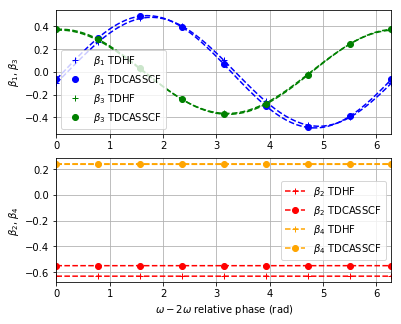

In [74]:
plt.figure(figsize=(6,5))

plt.subplot(211)


# plt.plot(relative_phase1,tdse_betas['beta1'], linestyle='-',color='blue', label=r"$\beta_1$ TDSE")
plt.plot(relative_phase,tdhf_betas['beta1'], linestyle='None', marker='+',color='blue', label=r"$\beta_1$ TDHF")
plt.plot(relative_phase,tdcasscf_betas['beta1'], linestyle='None', marker='o',color='blue', label=r"$\beta_1$ TDCASSCF")
plt.plot(x1,y__tdhf1,color='blue', linestyle='--')
plt.plot(x1,y__tdcasscf1,color='blue', linestyle='--')



# plt.plot(relative_phase1,tdse_betas['beta3'], linestyle='-',color='green', label=r"$\beta_3$ TDSE")
plt.plot(relative_phase,tdhf_betas['beta3'], linestyle='None', marker='+',color='green', label=r"$\beta_3$ TDHF")
plt.plot(relative_phase,tdcasscf_betas['beta3'], linestyle='None', marker='o',color='green', label=r"$\beta_3$ TDCASSCF")


plt.plot(x1,y__tdhf3,color='green' ,linestyle='--')
plt.plot(x1,y__tdcasscf3,color='green', linestyle='--')




plt.legend()
# plt.xlabel(r'$\omega-2\omega$ relative phase (rad)')
plt.ylabel(r"$\beta_1$, $\beta_3$")
plt.xlim(0,6.28)

plt.grid(True)

plt.subplot(212)

# plt.plot(relative_phase1,tdse_betas['beta2'], linestyle='-',color='red', label=r"$\beta_2$ TDSE")
plt.plot(relative_phase,tdhf_betas['beta2'], linestyle='--', marker='+',color='red', label=r"$\beta_2$ TDHF")
plt.plot(relative_phase,tdcasscf_betas['beta2'], linestyle='--', marker='o',color='red', label=r"$\beta_2$ TDCASSCF")



# plt.plot(relative_phase1,tdse_betas['beta4'], linestyle='-',color='orange', label=r"$\beta_4$ TDSE")
plt.plot(relative_phase,tdhf_betas['beta4'], linestyle='--', marker='+',color='orange', label=r"$\beta_4$ TDHF")
plt.plot(relative_phase,tdcasscf_betas['beta4'], linestyle='--', marker='o',color='orange', label=r"$\beta_4$ TDCASSCF")



plt.legend()

plt.xlabel(r'$\omega-2\omega$ relative phase (rad)')
plt.ylabel(r"$\beta_2$, $\beta_4$")

plt.xlim(0,6.28)
# plt.ylim(0.3,2.3)


plt.grid(True)

plt.savefig('ALL_in.png', dpi=300)

plt.show()

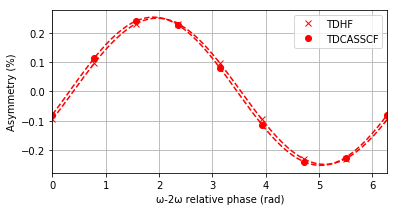

In [49]:
x = np.asarray(relative_phase)
y_tdhfa = np.array(tdhf_betas['asymmetry'])
y_tdcasscfa = np.array(tdcasscf_betas['asymmetry'])


p_tdhfa, params_covariance = optimize.curve_fit(test_func, x, y_tdhfa)
p_tdcasscfa, params_covariance = optimize.curve_fit(test_func, x, y_tdcasscfa)

x = np.arange(0,4*np.pi,0.1)   
ya1 = p_tdhfa[0]*np.cos(x + p_tdhfa[1])
ya2 = p_tdcasscfa[0]*np.cos(x + p_tdcasscfa[1])
plt.figure(figsize=(6, 3))

# plt.plot(relative_phase1,tdse_betas['asymmetry'], linestyle='-',color='red', label="TDSE")


plt.plot(x,ya1,color='red',linestyle='--' )

# plt.plot(relative_phase,tdcasscf_betas['asymmetry'], linestyle='None', marker='*',color='red', label="MCTDHF")
plt.plot(x,ya2,color='red', linestyle='--')

plt.plot(relative_phase,tdhf_betas['asymmetry'], linestyle='None', marker='x',color='red', label="TDHF")
plt.plot(relative_phase,tdcasscf_betas['asymmetry'], linestyle='None', marker='o',color='red', label="TDCASSCF")


plt.xlabel('ω-2ω relative phase (rad)')
plt.xlim(0, 6.28)
plt.xticks(np.arange(0,6.28,1))
plt.grid(True)
plt.legend()
plt.ylabel("Asymmetry (%)")
plt.savefig('asymmetry.png', dpi=300)




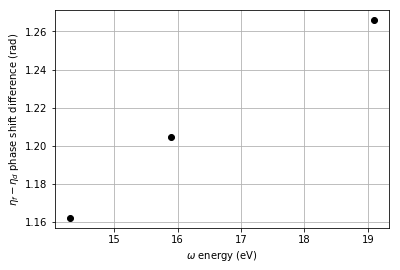

In [77]:
wigner_delay=[1.1620, 1.2047, 1.2659]
photon_energy=[14.3, 15.9, 19.1]

plt.figure(figsize=(6, 4))
plt.plot(photon_energy, np.array(wigner_delay), linestyle="None", marker='o', color='black')
# plt.ylim(4.9, 5.2)
plt.xlabel(r"$\omega$ energy (eV)")
plt.ylabel(r'$\eta_f-\eta_d$ phase shift difference (rad)')




plt.grid(True)


plt.savefig('phase_shift.png', dpi=300)


